<a href="https://colab.research.google.com/github/nayakr1127/ANN-using-tensorflow-2/blob/main/ANN_in_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

In [ ]:


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True )

Mounted at /content/gdrive


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/gdrive/MyDrive/Krish Naik/5Complete-ANN-Deep-Learning-master/ANN/Churn_Modelling.csv')

In [ ]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)


In [ ]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
print(keras.__version__)

2.4.3


In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(6, activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(6,activation='relu'))
# Adding the output layer
classifier.add(Dense( 1, activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy',metrics=['accuracy'])


In [ ]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 100)


Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5926 - accuracy: 0.7438
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4913 - accuracy: 0.7984
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4596 - accuracy: 0.7983
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4436 - accuracy: 0.8049
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4311 - accuracy: 0.8086
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4355 - accuracy: 0.8086
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4225 - accuracy: 0.8144
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4259 - accuracy: 0.8153
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4073 - accuracy: 0.8264
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4223 - accura

dict_keys(['loss', 'accuracy'])


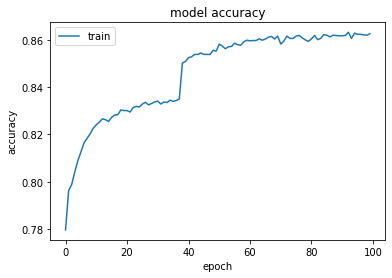

In [ ]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
# plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


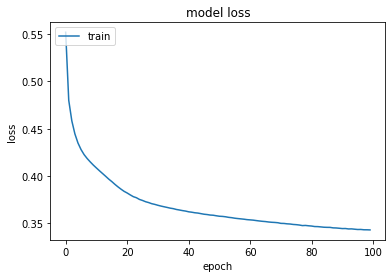

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
# plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score


0.863